<a href="https://colab.research.google.com/github/SlowPoke228/Lessons/blob/main/L1(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier
# url db: https://www.kaggle.com/christianlillelund/csgo-round-winner-classification
# url lesson: https://colab.research.google.com/drive/11BB1lgD5GoG8gEjgGUSNPVkPnuFe7bfO#scrollTo=dtktXWwG931_

# Указываем тайтлы для столбцов
names = ['time_left','ct_score','t_score','map','bomb_planted','ct_health','t_health','ct_armor','t_armor','ct_money','t_money','ct_helmets',
        't_helmets','ct_defuse_kits','ct_players_alive','t_players_alive','ct_weapon_ak47','t_weapon_ak47','ct_weapon_aug','t_weapon_aug','ct_weapon_awp'
        ,'t_weapon_awp','ct_weapon_bizon','t_weapon_bizon','ct_weapon_cz75auto','t_weapon_cz75auto','ct_weapon_elite','t_weapon_elite','ct_weapon_famas',
        't_weapon_famas','ct_weapon_g3sg1','t_weapon_g3sg1','ct_weapon_galilar','t_weapon_galilar','ct_weapon_glock','t_weapon_glock','ct_weapon_m249','t_weapon_m249'
        ,'ct_weapon_m4a1s','t_weapon_m4a1s','ct_weapon_m4a4','t_weapon_m4a4','ct_weapon_mac10','t_weapon_mac10','ct_weapon_mag7'
         ,'t_weapon_mag7','ct_weapon_mp5sd','t_weapon_mp5sd','ct_weapon_mp7','t_weapon_mp7','ct_weapon_mp9','t_weapon_mp9','ct_weapon_negev','t_weapon_negev','ct_weapon_nova',
        't_weapon_nova','ct_weapon_p90','t_weapon_p90','ct_weapon_r8revolver','t_weapon_r8revolver','ct_weapon_sawedoff','t_weapon_sawedoff','ct_weapon_scar20',
       't_weapon_scar20','ct_weapon_sg553','t_weapon_sg553','ct_weapon_ssg08','t_weapon_ssg08','ct_weapon_ump45','t_weapon_ump45','ct_weapon_xm1014',
       't_weapon_xm1014','ct_weapon_deagle','t_weapon_deagle','ct_weapon_fiveseven','t_weapon_fiveseven','ct_weapon_usps','t_weapon_usps','ct_weapon_p250','t_weapon_p250',
       'ct_weapon_p2000','t_weapon_p2000','ct_weapon_tec9','t_weapon_tec9','ct_grenade_hegrenade','t_grenade_hegrenade','ct_grenade_flashbang','t_grenade_flashbang',
       'ct_grenade_smokegrenade','t_grenade_smokegrenade','ct_grenade_incendiarygrenade','t_grenade_incendiarygrenade','ct_grenade_molotovgrenade','t_grenade_molotovgrenade',
       'ct_grenade_decoygrenade','t_grenade_decoygrenade','round_winner'
]

# Подключаем бд, удаляем первую стоку и указываем тайтлы
dataset = pd.read_csv("/content/drive/MyDrive/csgo_round_snapshots.csv", names=names, skiprows=1)
dataset

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,ct_weapon_elite,t_weapon_elite,ct_weapon_famas,t_weapon_famas,ct_weapon_g3sg1,t_weapon_g3sg1,ct_weapon_galilar,t_weapon_galilar,ct_weapon_glock,t_weapon_glock,ct_weapon_m249,t_weapon_m249,ct_weapon_m4a1s,t_weapon_m4a1s,...,t_weapon_p90,ct_weapon_r8revolver,t_weapon_r8revolver,ct_weapon_sawedoff,t_weapon_sawedoff,ct_weapon_scar20,t_weapon_scar20,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,t_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_xm1014,t_weapon_xm1014,ct_weapon_deagle,t_weapon_deagle,ct_weapon_fiveseven,t_weapon_fiveseven,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_weapon_p2000,t_weapon_p2000,ct_weapon_tec9,t_weapon_tec9,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

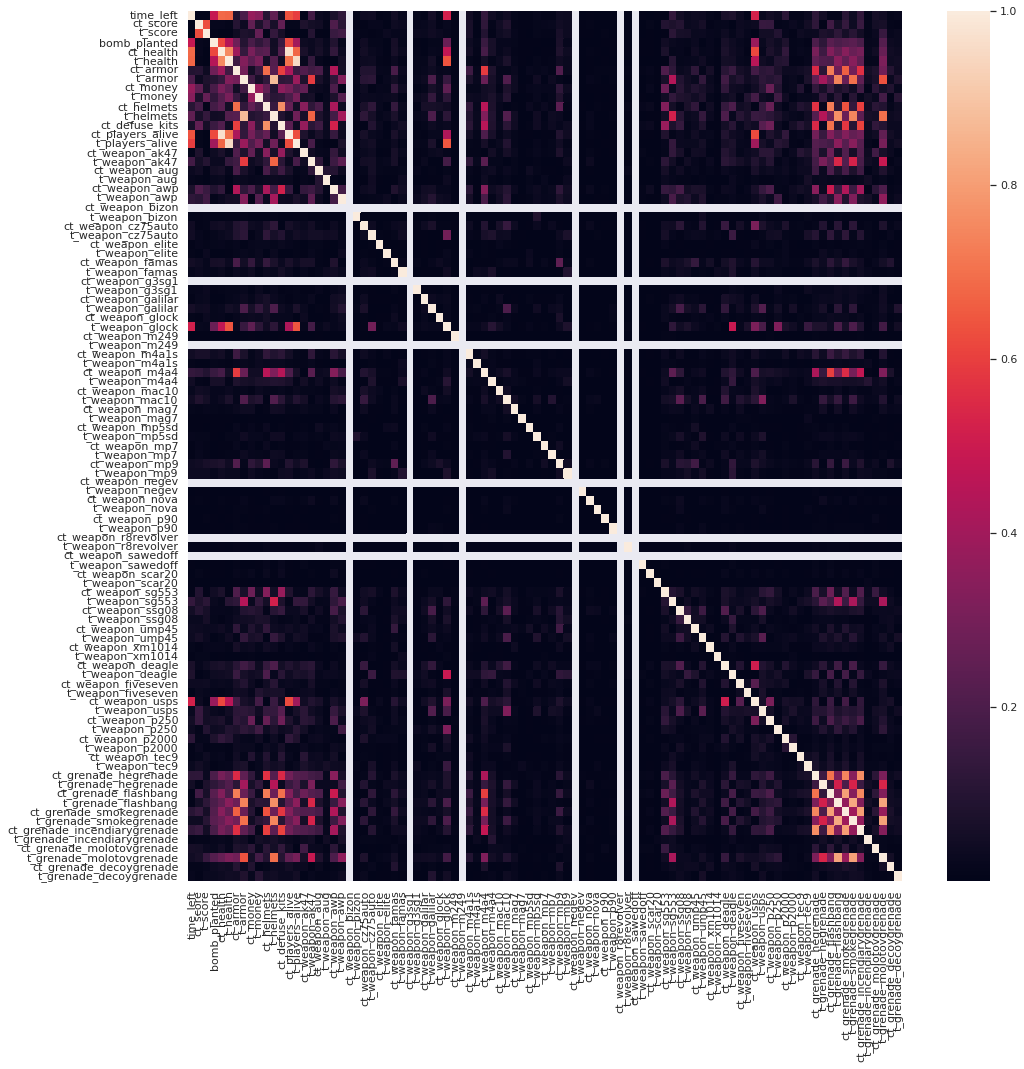

In [ ]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = dataset.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(16, 16)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
#удаляем данные с слишком высокой и слишком низкой корреляцией
dataset = dataset.drop(['map','bomb_planted','ct_weapon_bizon','t_weapon_bizon','ct_weapon_cz75auto','t_weapon_cz75auto','ct_weapon_elite','t_weapon_elite','ct_weapon_famas',
        't_weapon_famas','ct_weapon_g3sg1','t_weapon_g3sg1','ct_weapon_galilar','t_weapon_galilar','ct_weapon_glock','ct_weapon_m249','t_weapon_m249'
        ,'ct_weapon_m4a1s','t_weapon_m4a1s','ct_weapon_mac10','ct_weapon_mag7','t_weapon_mag7','ct_weapon_mp5sd','t_weapon_mp5sd','ct_weapon_mp7','t_weapon_mp7','t_weapon_mp9',
        'ct_weapon_negev','t_weapon_negev','ct_weapon_nova','ct_weapon_xm1014','t_weapon_xm1014','t_weapon_nova','ct_weapon_p90','t_weapon_p90','ct_weapon_r8revolver','t_weapon_r8revolver',
        'ct_weapon_sawedoff','t_weapon_sawedoff','ct_weapon_scar20','t_weapon_scar20','ct_grenade_decoygrenade','t_grenade_decoygrenade','t_grenade_incendiarygrenade','ct_weapon_p2000','t_weapon_p2000',
        'ct_weapon_tec9','t_weapon_tec9','t_weapon_aug','ct_players_alive','t_players_alive','t_weapon_m4a4','t_weapon_ssg08','ct_grenade_molotovgrenade','ct_weapon_fiveseven','t_weapon_fiveseven'], 
        axis='columns')
dataset

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,ct_weapon_awp,t_weapon_awp,t_weapon_glock,ct_weapon_m4a4,t_weapon_mac10,ct_weapon_mp9,ct_weapon_sg553,t_weapon_sg553,ct_weapon_ssg08,ct_weapon_ump45,t_weapon_ump45,ct_weapon_deagle,t_weapon_deagle,ct_weapon_usps,t_weapon_usps,ct_weapon_p250,t_weapon_p250,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_molotovgrenade,round_winner
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,CT
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,CT
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,T
122406,174.93,11.0,15.0,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,0.0,2.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,4.0,3.0,5.0,1.0,5.0,T
122408,94.93,11.0,15.0,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,0.0,2.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,5.0,0.0,3.0,0.0,4.0,T


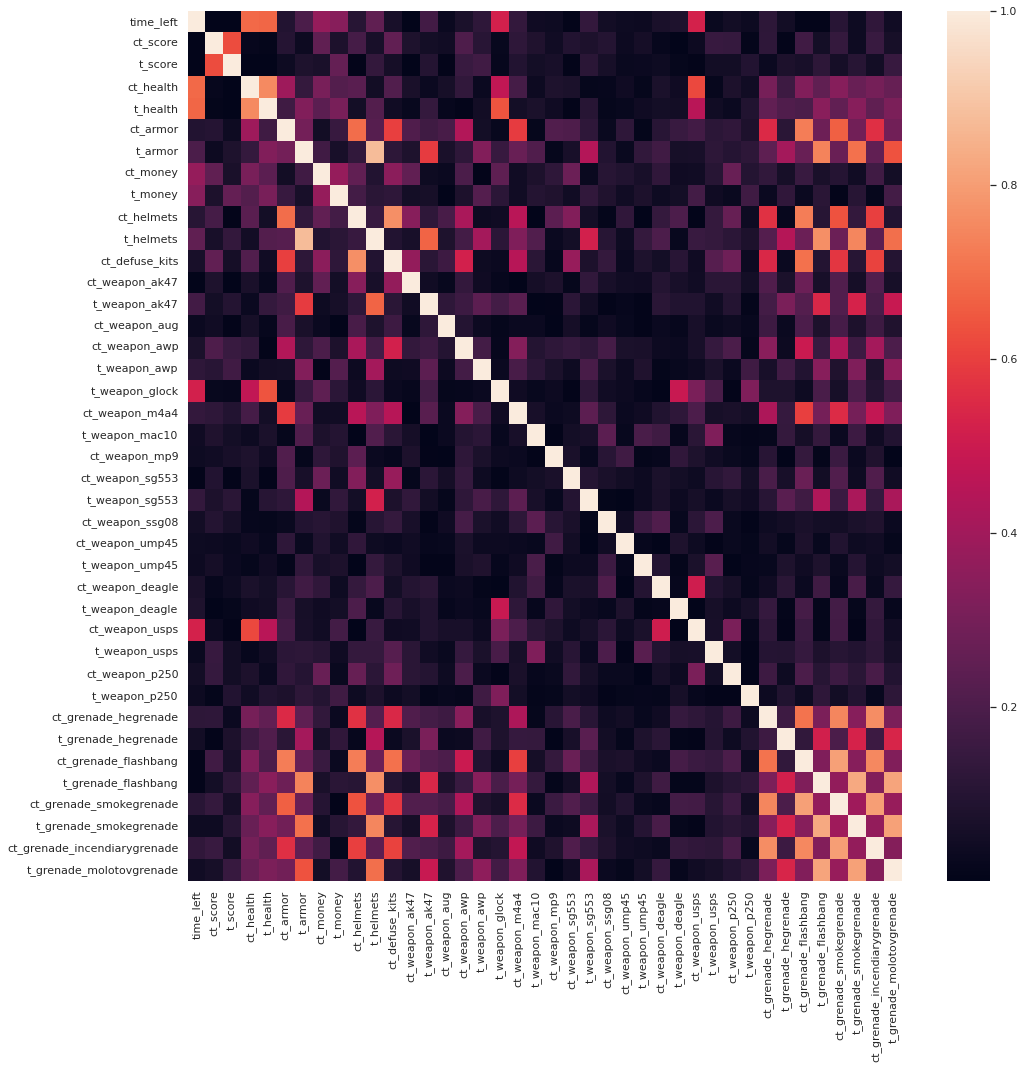

In [ ]:
# еще раз построим тепловую карту, чтобы убедиться в корректности выбранных данных
corr = dataset.corr().abs()
sns.set(rc={'figure.figsize':(16, 16)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
# Создаем массивы с атрибутами и метками
X = dataset.iloc[:, :-1].values    
y = dataset.iloc[:, len(dataset.columns)-1].values
y

array(['CT', 'CT', 'CT', ..., 'T', 'T', 'T'], dtype=object)

In [ ]:
# разделяем массивы на тренеровочные и тестовые 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# классификатор
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



In [ ]:
# вывод метрик
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4644 1397]
 [1385 4815]]
              precision    recall  f1-score   support

          CT       0.77      0.77      0.77      6041
           T       0.78      0.78      0.78      6200

    accuracy                           0.77     12241
   macro avg       0.77      0.77      0.77     12241
weighted avg       0.77      0.77      0.77     12241



In [ ]:

error = []

# Перебор значений К 
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
error

[0.18372681970427251,
 0.21297279634016827,
 0.2132178743566702,
 0.22857609672412385,
 0.22726901396944693,
 0.23952291479454293,
 0.2405849195327179,
 0.2467935626174332,
 0.2467935626174332,
 0.24924434278245242,
 0.24973449881545626,
 0.2528388203578139,
 0.2527571276856466,
 0.25659668327751,
 0.2540642104403235,
 0.2574953026713504,
 0.2578220733600196,
 0.2624785556735561,
 0.2614165509353811]

Text(0, 0.5, 'Значение ошибки')

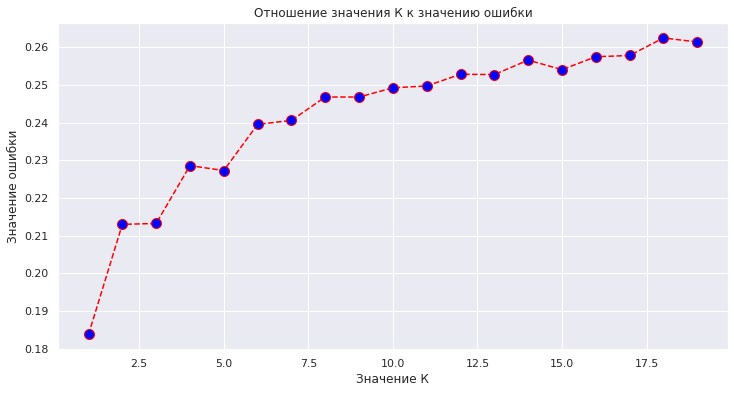

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Отношение значения К к значению ошибки')
plt.xlabel('Значение К')
plt.ylabel('Значение ошибки')

Оптимальное значениие соседий

In [ ]:
error.index(min(error))+1

1

In [ ]:
# пересчет с оптимальным значением соседий
classifier = KNeighborsClassifier(n_neighbors=error.index(min(error))+1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# вывод метрик
cf=confusion_matrix(y_test, y_pred)
print(cf)
print(classification_report(y_test, y_pred))

[[4926 1115]
 [1134 5066]]
              precision    recall  f1-score   support

          CT       0.81      0.82      0.81      6041
           T       0.82      0.82      0.82      6200

    accuracy                           0.82     12241
   macro avg       0.82      0.82      0.82     12241
weighted avg       0.82      0.82      0.82     12241



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f99bc835910>],
      dtype=object)

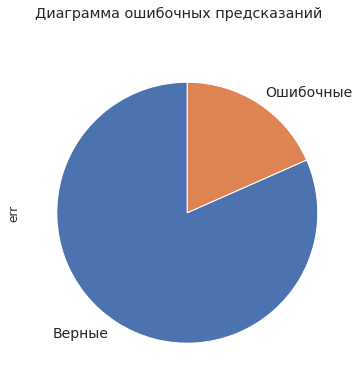

In [ ]:
pc=pd.DataFrame({'err':[cf[0][0]+cf[1][1],cf[0][1]+cf[1][0]]}) 
pc.plot.pie(subplots=True,  title = 'Диаграмма ошибочных предсказаний', 
            labels=['Верные','Ошибочные'],legend=False,figsize=(10,6),
            startangle=90, fontsize=14)